In [37]:
import re
from difflib import SequenceMatcher

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [38]:
movies = pd.read_csv('Datasets/ml-latest-small/movies.csv')
movies = movies.drop(['genres'], axis='columns')

In [39]:
movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [40]:
ratings = pd.read_csv('Datasets/ml-latest-small/ratings.csv')
ratings = ratings.drop(['timestamp'], axis='columns')

In [41]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [42]:
ratings.rating.sort_values().unique()

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [43]:
movies.shape #0-rows, 1-columns and for all coloumns try movies.count()

(9742, 2)

In [44]:
ratings.values.shape[0]

100836

In [45]:
ratings['userId'].nunique()

610

In [47]:
popular_movies_thresh = 25
active_users_thresh = 100

In [49]:
ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [51]:
ratings.groupby('movieId').size().sort_values(ascending=False)

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
57502       1
57522       1
57526       1
4032        1
193609      1
Length: 9724, dtype: int64

In [52]:
np.arange(len(movies_count))

NameError: name 'movies_count' is not defined

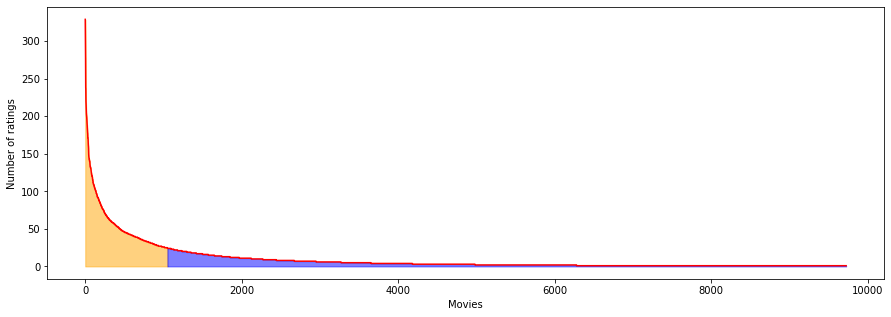

In [53]:
movies_count = pd.DataFrame(ratings.groupby('movieId').size().sort_values(ascending=False),columns =['count'])
divider = len(movies_count.query('count >= @popular_movies_thresh'))
fig, (ax) = plt.subplots(1, 1, figsize=(15,5))
plt.plot(np.arange(len(movies_count)), movies_count['count'], color='red')
plt.xlabel('Movies')
plt.ylabel('Number of ratings')
ax.fill_between(np.arange(0,divider),0,movies_count['count'][:divider],color='orange', alpha=0.5)
ax.fill_between(np.arange(divider,len(movies_count)),movies_count['count'][divider:],color='blue', alpha=0.5)

In [54]:
popular_movies_indices = movies_count.query('count >= @popular_movies_thresh').index
popular_ratings = ratings[ratings['movieId'].isin(popular_movies_indices)]

In [55]:
popular_movies_indices = movies_count.query('count >= @popular_movies_thresh').index
popular_movies_indices

Int64Index([   356,    318,    296,    593,   2571,    260,    480,    110,
               589,    527,
            ...
              2598,   2986,   4823,   1253,   8983,   1343, 168252,  27706,
              3798,   3005],
           dtype='int64', name='movieId', length=1050)

In [56]:
popular_ratings = ratings[ratings['movieId'].isin(popular_movies_indices)]
popular_ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100803,610,148626,4.0
100808,610,152081,4.0
100829,610,164179,5.0
100830,610,166528,4.0


In [57]:
print(ratings.shape[0])
popular_ratings.shape[0]

100836


62518

In [58]:
print(ratings.groupby('movieId').count().shape[0])
popular_ratings.groupby('movieId').count().shape[0]

9724


1050

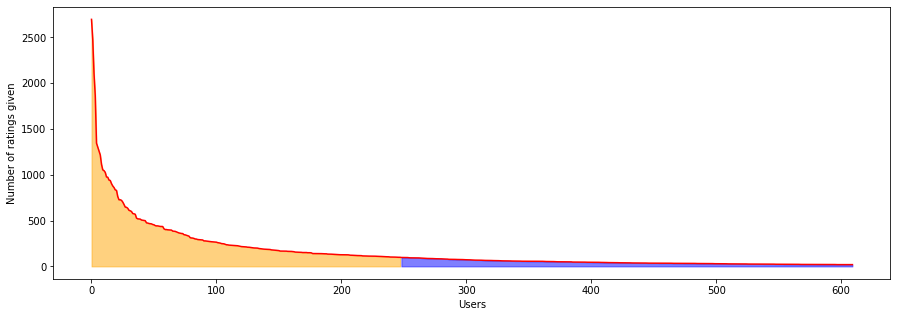

In [59]:
users_count = pd.DataFrame(ratings.groupby('userId').size().sort_values(ascending=False),columns =['count'])
divider = len(users_count.query('count >= @active_users_thresh'))
fig, (ax) = plt.subplots(1, 1, figsize=(15,5))
plt.plot(np.arange(len(users_count)), users_count['count'], color='red')
plt.xlabel('Users')
plt.ylabel('Number of ratings given')
ax.fill_between(np.arange(0,divider),0,users_count['count'][:divider],color='orange', alpha=0.5)
ax.fill_between(np.arange(divider,len(users_count)),users_count['count'][divider:],color='blue', alpha=0.5)

In [60]:
active_users_indices = users_count.query('count >= @active_users_thresh').index
active_users_ratings = ratings[ratings['userId'].isin(active_users_indices)]

In [61]:
popular_ratings.shape[0]

62518

In [62]:
active_users_ratings.shape[0]

84313

In [63]:
popular_ratings.groupby('userId').count().shape[0]

610

In [65]:
active_users_ratings.groupby('userId').count().shape[0]

248

In [66]:
pivot_table = active_users_ratings.pivot(index='movieId', columns='userId', values='rating').fillna(0)

In [68]:
pivot_table.index.shape[0]

9557

In [70]:
pivot_table.columns.shape[0]

248

In [79]:
pivot_table.head()

(9557, 248)

In [80]:
sparse_matrix = csr_matrix(pivot_table.values)
sparse_matrix.shape

(9557, 248)

In [76]:
print(sparse_matrix)

  (0, 0)	4.0
  (0, 3)	4.5
  (0, 5)	2.5
  (0, 6)	4.5
  (0, 7)	3.5
  (0, 8)	4.0
  (0, 10)	3.5
  (0, 14)	3.0
  (0, 16)	3.0
  (0, 17)	3.0
  (0, 19)	5.0
  (0, 22)	5.0
  (0, 23)	4.0
  (0, 25)	3.0
  (0, 28)	5.0
  (0, 32)	5.0
  (0, 33)	4.0
  (0, 34)	4.0
  (0, 35)	2.5
  (0, 36)	4.5
  (0, 38)	0.5
  (0, 40)	2.5
  (0, 43)	3.0
  (0, 44)	4.0
  (0, 47)	4.0
  :	:
  (9534, 185)	5.0
  (9535, 185)	4.5
  (9536, 25)	3.0
  (9536, 158)	4.0
  (9536, 235)	4.0
  (9537, 133)	3.5
  (9538, 86)	4.5
  (9539, 205)	4.0
  (9540, 133)	4.5
  (9541, 76)	4.0
  (9542, 133)	2.5
  (9543, 85)	1.0
  (9544, 185)	2.5
  (9545, 25)	3.5
  (9546, 76)	4.5
  (9547, 76)	3.5
  (9548, 76)	3.0
  (9549, 76)	4.0
  (9550, 76)	4.0
  (9551, 76)	3.5
  (9552, 76)	4.0
  (9553, 76)	3.5
  (9554, 76)	3.5
  (9555, 76)	3.5
  (9556, 139)	4.0


In [82]:
pivot_table_movies = movies.set_index('movieId').loc[pivot_table.index]['title'].values
title_to_id = {movie : i for i, movie in enumerate(pivot_table_movies)}

In [83]:
id_to_title = {v : k for k, v in title_to_id.items()}

In [84]:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(sparse_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [85]:
def find_matches(title_to_id, movie_title):
    movie_ids = np.array(list(title_to_id.values())).astype(int)
    titles = np.array(list(title_to_id.keys()))
    ratios = list()
    for title, movie_id in title_to_id.items():
        ratio = SequenceMatcher(None, movie_title, title, autojunk = False).ratio()
        ratios.append(ratio)
    titles, ids = titles[np.argsort(ratios)][-10:], movie_ids[np.argsort(ratios)][-10:]
    return list(reversed(list(zip(titles, ids))))

In [108]:
title = input("Enter the movie name: ")
options = find_matches(title_to_id, title)

import ipywidgets as widgets
drop = widgets.Dropdown(options=options)
drop

Enter the movie name: immitation game


Dropdown(options=(('The Imitation Game (2014)', 8416), ('Imitation of Life (1959)', 4111), ('Annihilation (201…

In [109]:
movie_id = drop.value
test = pivot_table.iloc[movie_id, :].values.reshape(1, -1)

distances, indices = model_knn.kneighbors(test, n_neighbors=10+1)

indices = indices.squeeze()[1:]

print('Recommendations for: ', id_to_title[movie_id])
for i, index in enumerate(indices):
    print(i+1, '.', id_to_title[index])

Recommendations for:  The Imitation Game (2014)
1 . Harry Potter and the Deathly Hallows: Part 2 (2011)
2 . Grand Budapest Hotel, The (2014)
3 . Interstellar (2014)
4 . Edge of Tomorrow (2014)
5 . Guardians of the Galaxy (2014)
6 . Avengers, The (2012)
7 . Deadpool (2016)
8 . Guardians of the Galaxy 2 (2017)
9 . The Martian (2015)
10 . The Hunger Games: Catching Fire (2013)
